In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
print(tf.__version__)
# 20231225 應該是當初安裝時程式有異，所以keras沒抓到tensorflow預設的版本
#print(keras.__version__)


2.14.0


In [3]:
# For test HPNB (Windows) tensorflow env is OK
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [4]:
# For test HPNB (Windows) tensorflow env is OK
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)


11490434/11490434 [==============================] - 16s 1us/step
Epoch 1/5
938/938 [==============================] - 10s 10ms/step - loss: 0.1858 - accuracy: 0.9420
Epoch 2/5
938/938 [==============================] - 10s 11ms/step - loss: 0.0503 - accuracy: 0.9844
Epoch 3/5
938/938 [==============================] - 10s 11ms/step - loss: 0.0338 - accuracy: 0.9892
Epoch 4/5
938/938 [==============================] - 10s 11ms/step - loss: 0.0249 - accuracy: 0.9920
Epoch 5/5
938/938 [==============================] - 10s 11ms/step - loss: 0.0198 - accuracy: 0.9940


In [10]:
# 要run 5.8前要先完成5.5 ~ 5.7
# 5.5
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 128)      

In [14]:
# 5.6
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [15]:
# 5.7
from keras.preprocessing.image import ImageDataGenerator

# 20231225 Windows 路徑要雙斜線「\\」
#-- HPNB --
#train_dir = "C:\\WORKSPACES\\Datasets\\cats_and_dogs_small\\train"
#validation_dir = "C:\\WORKSPACES\\Datasets\\cats_and_dogs_small\\validation"
#-- VAIONB --
#train_dir = "D:\\WORKSPACES\\Datasets\\cats_and_dogs_small\\train"
#validation_dir = "D:\\WORKSPACES\\Datasets\\cats_and_dogs_small\\validation"
#-- ASUSPC --
train_dir = "E:\\WORKSPACES\\Datasets\\cats_and_dogs_small\\train"
validation_dir = "E:\\WORKSPACES\\Datasets\\cats_and_dogs_small\\validation"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
# 5.8
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

C:\Users\linea\AppData\Local\Temp\ipykernel_33456\2223947943.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


NameError: name 'scipy' is not defined

In [22]:
# 5.9
model.save('cats_and_dogs_small_1.h5')

C:\PROGRAMS\anaconda3\envs\tf\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
# 5.11
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


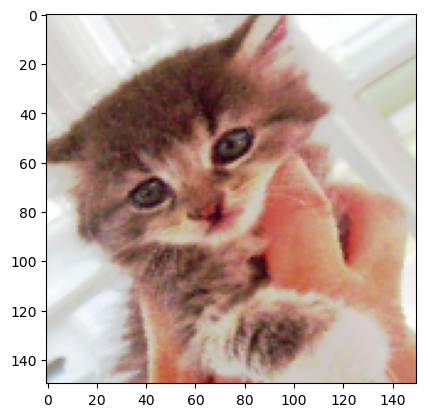

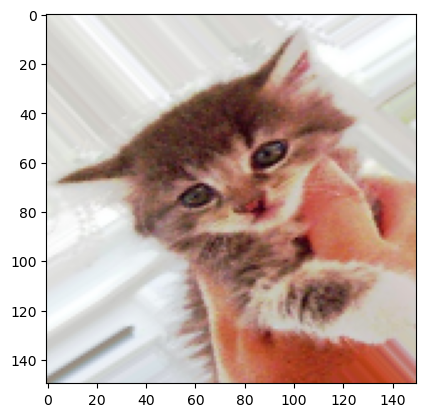

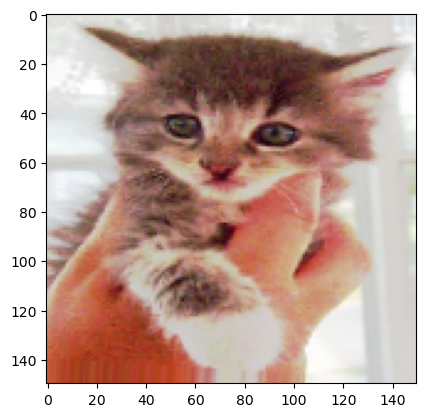

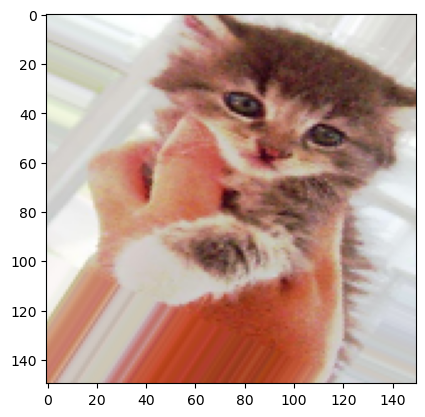

In [24]:
# 5.12
from keras.preprocessing import image

# HPNB
#train_cats_dir = "C:\\WORKSPACES\\Datasets\\cats_and_dogs_small\\train\\cats"
# VAIONB
train_cats_dir = "D:\\WORKSPACES\\Datasets\\cats_and_dogs_small\\train\\cats"

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
#print(fnames)

img_path = fnames[3]
#print(fnames[3])
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()
